# 🔹 Step 1: Read the Image

In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


(np.float64(-0.5), np.float64(1365.5), np.float64(767.5), np.float64(-0.5))

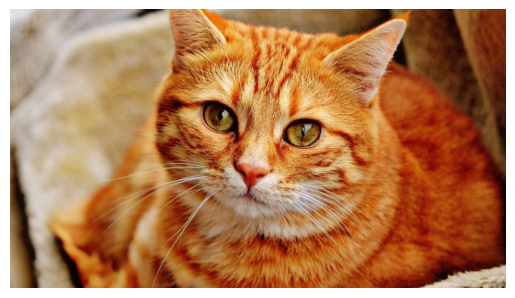

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\Shuhaib\Downloads\2848622.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')


# 🔹 Step 2: Convert Image into Pixel Data

In [2]:
import numpy as np

pixels = img.reshape((-1, 3))
pixels = np.float32(pixels)


In [3]:
#Elbow Method to Find Optimal Number of Clusters
sample_size = 8000
idx = np.random.choice(len(pixels), sample_size, replace=False)
pixel_sample = pixels[idx]

inertia = []
K_range = range(2, 8)
from sklearn.cluster import KMeans

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_sample)
    inertia.append(kmeans.inertia_)


C:\Users\Shuhaib\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Shuhaib\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Shuhaib\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shuhaib\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^

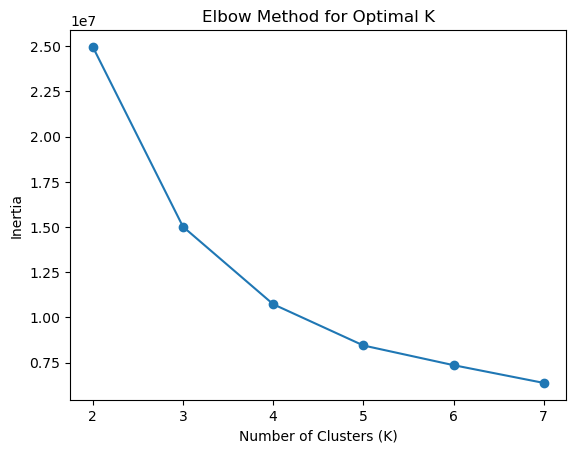

In [4]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


# 🔹 Step 3: Apply Clustering (K-Means)

In [5]:
K = 3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=K, random_state=42)
labels = kmeans.fit_predict(pixels)


# 🔹 Step 4: Reconstruct Segmented Image

(np.float64(-0.5), np.float64(1365.5), np.float64(767.5), np.float64(-0.5))

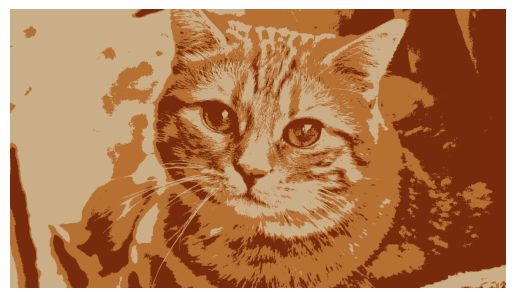

In [6]:
segmented_pixels = kmeans.cluster_centers_[labels]
segmented_image = segmented_pixels.reshape(img.shape)

plt.imshow(segmented_image.astype('uint8'))
plt.axis('off')


# 5️⃣ Object Detection After Segmentation

In [7]:
gray = cv2.cvtColor(segmented_image.astype('uint8'), cv2.COLOR_RGB2GRAY)
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [8]:
gray

array([[178, 178, 178, ...,  62,  62,  62],
       [178, 178, 178, ...,  62,  62,  62],
       [178, 178, 178, ...,  62,  62,  62],
       ...,
       [178, 178, 178, ..., 126, 126, 178],
       [178, 178, 178, ..., 126, 126, 126],
       [178, 178, 178, ..., 126, 126, 126]], dtype=uint8)

In [9]:
contours

(array([[[   0,    0]],
 
        [[   0,  767]],
 
        [[1365,  767]],
 
        [[1365,    0]]], dtype=int32),)

# 6️⃣ Evaluating Segmentation Quality – Silhouette Score

In [10]:
from sklearn.metrics import silhouette_score
import numpy as np

sample_size = 6000 # safe value
idx = np.random.choice(len(pixels), sample_size, replace=False)

score = silhouette_score(pixels[idx], labels[idx])
print("Silhouette Score:", score)


Silhouette Score: 0.44831806
